# Mutation overdispersion in Fig 4B

In [1]:
import json

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import seaborn as sns

In [2]:
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [3]:
sigs_color = {
'SBS1': '#1e79baff',
 'SBS17b': '#ff8921ff'
}

In [4]:
data_dir = './data'

In [5]:
def mutations_across_megabases(input_f, total_bins): 
    """Load mutations across genomic bins and return the percentage of mutations per bin"""
    
    with open(input_f, 'r') as fd: 
        m_per_bin = json.load(fd)

    mutations = []
    for binid in total_bins: 
        binid_data = m_per_bin.get(binid)
        if binid_data:
            mutations += [binid_data.get(signature, 0)]
    total_mutations = sum(mutations)

    norm_mutations = []
    for binid in total_bins: 
        binid_data = m_per_bin.get(binid)
        if binid_data:
            norm_mutations += [100*binid_data.get(signature, 0)/total_mutations]
        else: 
            norm_mutations += [0]
    
    return norm_mutations

### Load data

- 1 Mpb mappable genomic bins.
- SBS1 and SBS17b in COADREAD and ESOPHA_STOMACH mutation counts across mappable megabases, obtained from observed data in the cancer type.

#### Megabases

In [6]:
# Load 1 Mbp bins across autosomes
bins_f = f'{data_dir}/hg38_1000kb_bin.nodrivers.filtered.all_positions.autosomes.bed.gz'
bins_autosom_df = pd.read_csv(bins_f, sep='\t', header=0)
bins_autosom_df.head()

,CHR,START,END,BINID
0,chr1,4000000,5000000,chr1:4000000-5000000
1,chr1,5000000,6000000,chr1:5000000-6000000
2,chr1,8000000,9000000,chr1:8000000-9000000
3,chr1,9000000,10000000,chr1:9000000-10000000
4,chr1,14000000,15000000,chr1:14000000-15000000


In [7]:
total_bins = bins_autosom_df['BINID'].unique()
len(total_bins)

2196

#### COADREAD mutations

In [8]:
ctype = 'COADREAD'
signature = 'SBS1'
input_f = f'{data_dir}/{ctype}.1000kb.nodrivers.total_maxprob.mutations_per_bin.json'
sbs1_coadread = mutations_across_megabases(input_f, total_bins)
sbs1_coadread[:5]

[0.1038183143241476,
 0.06792304150194524,
 0.026105652961601725,
 0.043509421602669546,
 0.04701434723177348]

In [9]:
ctype = 'COADREAD'
signature = 'SBS17b'
input_f = f'{data_dir}/{ctype}.1000kb.nodrivers.total_maxprob.mutations_per_bin.json'
sbs17b_coadread = mutations_across_megabases(input_f, total_bins)
sbs17b_coadread[:5]

[0.04022451467575947,
 0.031973332178167786,
 0.008251182497591686,
 0.006600945998073349,
 0.027228902242052565]

#### ESOPHA_STOMACH mutations

In [10]:
ctype = 'ESOPHA_STOMACH'
signature = 'SBS1'
input_f = f'{data_dir}/{ctype}.1000kb.nodrivers.total_maxprob.mutations_per_bin.json'
sbs1_esopha_stomach = mutations_across_megabases(input_f, total_bins)
sbs1_esopha_stomach[:5]

[0.12716496734909702,
 0.084992911850672,
 0.03860365080240446,
 0.048984464463555234,
 0.07753170203171987]

In [11]:
ctype = 'ESOPHA_STOMACH'
signature = 'SBS17b'
input_f = f'{data_dir}/{ctype}.1000kb.nodrivers.total_maxprob.mutations_per_bin.json'
sbs17b_esopha_stomach = mutations_across_megabases(input_f, total_bins)
sbs17b_esopha_stomach[:5]

[0.09109506102892982,
 0.06967026444547073,
 0.0037295016274910293,
 0.002777288446003958,
 0.05499031123087837]

## Panel 4B

#### COADREAD

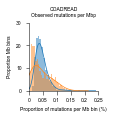

In [12]:
fig = plt.figure(figsize=(1.25, 1.25))
ax = plt.subplot2grid((1, 1), (0, 0))
ax.set_ylabel('Proportion Mb bins', fontsize=5)
ax.set_xlabel('Proportion of mutations per Mb bin (%)', fontsize=5)
plt.title(f'COADREAD\nObserved mutations per Mbp', fontsize=5)
color = sigs_color[signature]

sns.distplot(
    sbs1_coadread, hist=True, kde=True, 
    bins=30, color = sigs_color['SBS1'], 
    hist_kws={'edgecolor':None, 'alpha':0.5},
    kde_kws={'linewidth': 0.75, 'bw':0.01}
)
sns.distplot(
    sbs17b_coadread, hist=True, kde=True, 
    bins=30, color = sigs_color['SBS17b'], 
    hist_kws={'edgecolor':None, 'alpha':0.5},
    kde_kws={'linewidth': 0.75, 'bw':0.02}
)

ax.set_ylim(0, 30)
ax.set_xlim(0, 0.25)
ax.set_yticks([0, 10, 20, 30])
ax.set_yticklabels([0, 10, 20, 30], fontsize=5)
ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
ax.set_xticklabels([0, 0.05, 0.1, 0.15, 0.2, 0.25], fontsize=5)

ax.spines['left'].set(lw=0.5)
ax.spines['bottom'].set(lw=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_tick_params(width=0.5)
ax.yaxis.set_tick_params(width=0.5)

for extension in ['png']: 
    output = f'./fig_4B_COADREAD.{extension}'
    plt.savefig(output, bbox_inches='tight', dpi=350)

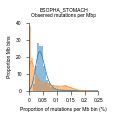

In [13]:
fig = plt.figure(figsize=(1.25, 1.25))
ax = plt.subplot2grid((1, 1), (0, 0))
ax.set_ylabel('Proportion Mb bins', fontsize=5)
ax.set_xlabel('Proportion of mutations per Mb bin (%)', fontsize=5)
plt.title(f'ESOPHA_STOMACH\nObserved mutations per Mbp', fontsize=5)
color = sigs_color[signature]

sns.distplot(
    sbs1_esopha_stomach, hist=True, kde=True, 
    bins=30, color = sigs_color['SBS1'], 
    hist_kws={'edgecolor': None, 'alpha':0.5},
    kde_kws={'linewidth': 0.75, 'bw':0.01}
)
sns.distplot(
    sbs17b_esopha_stomach, hist=True, kde=True, 
    bins=30, color = sigs_color['SBS17b'], 
    hist_kws={'edgecolor': None, 'alpha':0.5},
    kde_kws={'linewidth': 0.75, 'bw':0.01}
)

ax.set_ylim(0, 40)
ax.set_xlim(0, 0.25)
ax.set_yticks([0, 10, 20, 30, 40])
ax.set_yticklabels([0, 10, 20, 30, 40], fontsize=5)
ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
ax.set_xticklabels([0, 0.05, 0.1, 0.15, 0.2, 0.25], fontsize=5)

ax.spines['left'].set(lw=0.5)
ax.spines['bottom'].set(lw=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_tick_params(width=0.5)
ax.yaxis.set_tick_params(width=0.5)

for extension in ['png']: 
    output = f'./fig_4B_ESOPHA_STOMACH.{extension}'
    plt.savefig(output, bbox_inches='tight', dpi=350)